In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.shape

(10683, 11)

we have 10683 rows and 11 columns in our training dataset

In [12]:
test.shape

(2671, 10)

We have 2671 rows and 10 columns in our testing dataset.

In [5]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the columns are categorical except our targe variable 'Price'

In [6]:
for i in train.columns:
    print(i , train[i].nunique())

Airline 12
Date_of_Journey 44
Source 5
Destination 6
Route 128
Dep_Time 222
Arrival_Time 1343
Duration 368
Total_Stops 5
Additional_Info 10
Price 1870


In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is 1 missing value in Route and Total Stops in training dataset.We will drop them.

In [13]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there are no missing value in testing dataset.

In [ ]:
#Dropping missing value rows
train.dropna(inplace=True)

In [18]:
train.duplicated().sum()

220

There are 220 duplicate rows in train dataset.

In [ ]:
#Droppng the duplicate rows
train.drop_duplicates(keep='first',inplace=True)

In [20]:
train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Convert No Info in No info because both are same

In [21]:
train["Additional_Info"] = train["Additional_Info"].replace({'No Info': 'No info'})

#### Feature Engineering:

In [22]:
#Convert hours in minutes
train['Duration']=  train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']=  test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [23]:
#Date of Journey in train data
train["Journey_day"] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train["Journey_month"] = train['Date_of_Journey'].str.split('/').str[1].astype(int)
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [24]:
#Departure Time in train data
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [25]:
#Arrival Time in train data
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [26]:
#Date of Journey in test data
test["Journey_day"] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test["Journey_month"] = test['Date_of_Journey'].str.split('/').str[1].astype(int)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [27]:
#Departure Time in test data
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [28]:
#Arrival Time in test data
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

Text(0, 0.5, 'Count of flights')

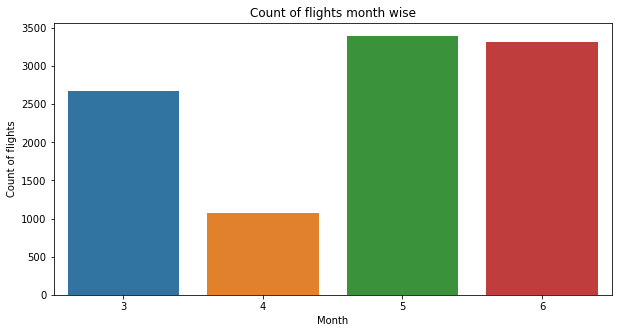

In [31]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
sns.countplot(x = 'Journey_month', data = train)
plt.xlabel('Month')
plt.ylabel('Count of flights')

highest number of flights in 5th month while lowest in 4th month

In [33]:
train["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

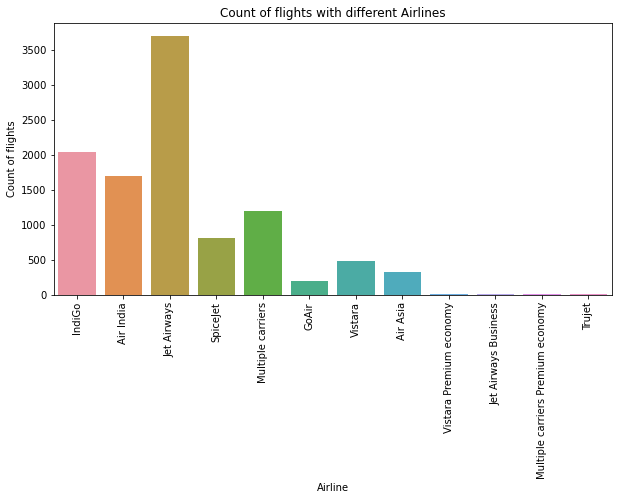

In [35]:
plt.figure(figsize = (10,5))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation=90)

There are more number of flights of Jet Airways.
Jet Airways Business, Vistara Premium economy, Trujet. Multiple carriers have actually almost negligible flights.

Text(0, 0.5, 'Price of ticket')

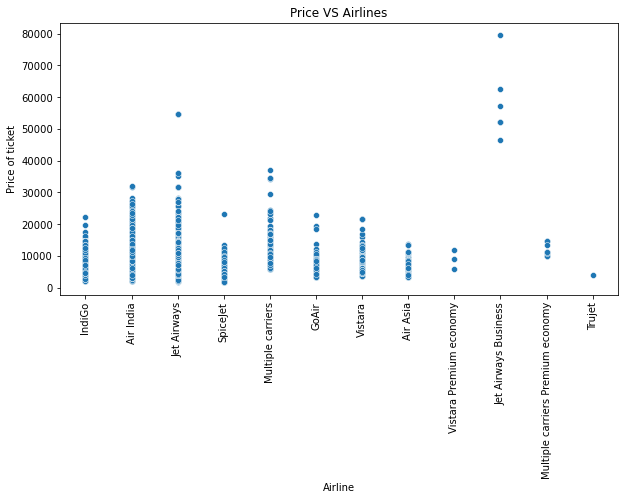

In [37]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.scatterplot(x=train['Airline'],y= train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')

ticket for Jet Airways Business airline is high.

##### Replacing Airline having negligible flights as other

In [39]:
train["Airline"].replace({'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other','Vistara Premium economy':'Other','Trujet':'Other'},    inplace=True)

In [40]:
test["Airline"].replace({'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other','Vistara Premium economy':'Other','Trujet':'Other'},    inplace=True)

Text(0, 0.5, 'Price of ticket')

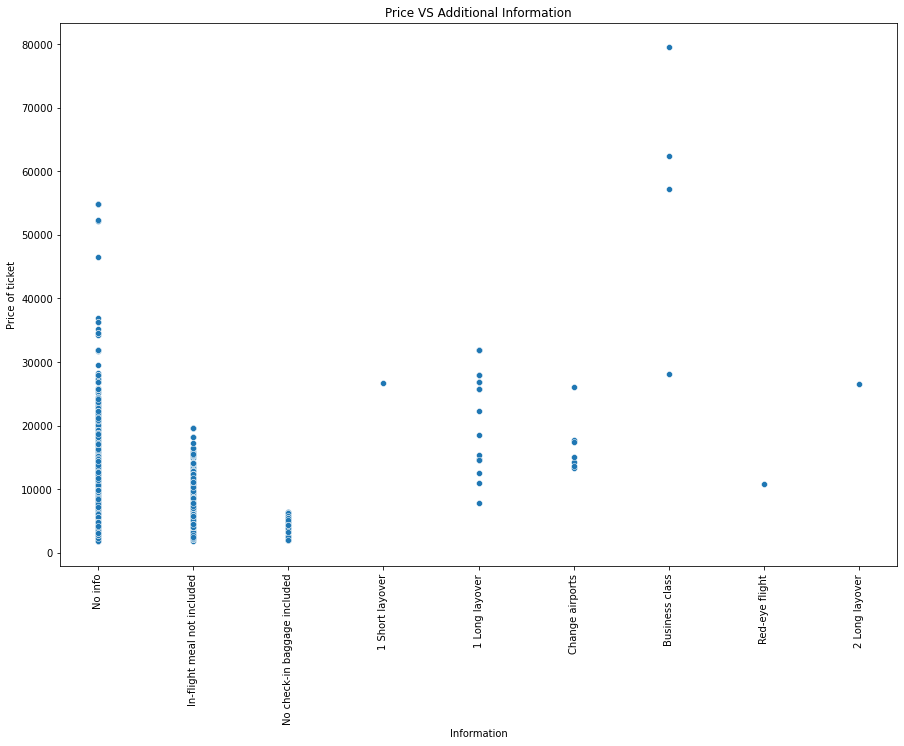

In [42]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(train['Additional_Info'], train['Price'],data=train)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

In [43]:
train["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

#Replacing negligible columns in #Additional_Info as Others in trainig and testing dataset

In [44]:
train["Additional_Info"].replace({'Change airports':'Other', 'Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other','2 Long layover':'Other',     },    inplace=True)

In [45]:
test["Additional_Info"].replace({'Change airports':'Other', 'Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other','2 Long layover':'Other',     },    inplace=True)

In [50]:
#Performing Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Airline']=le.fit_transform(train['Airline'])
train['Source']=le.fit_transform(train['Source'])
train['Destination']=le.fit_transform(train['Destination'])
train['Route']=le.fit_transform(train['Route'])
train['Total_Stops']=le.fit_transform(train['Total_Stops'])
train['Additional_Info']=le.fit_transform(train['Additional_Info'])

In [51]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,3,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,3,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,3,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,3,6218,12,5,18,5,23,30
4,3,0,5,29,285,0,3,13302,1,3,16,50,21,35


In [52]:
#Separating x and y for odel evaluation
x=train.drop('Price',axis=1)
y=train[['Price']]

In [55]:
#Performing label encoding for categorical features in test data
test['Airline']=le.fit_transform(test['Airline'])
test['Source']=le.fit_transform(test['Source'])
test['Destination']=le.fit_transform(test['Destination'])
test['Route']=le.fit_transform(test['Route'])
test['Total_Stops']=le.fit_transform(test['Total_Stops'])
test['Additional_Info']=le.fit_transform(test['Additional_Info'])

### Model Evaluation

In [58]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [59]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [60]:
model=[DecisionTreeRegressor(),SVR(), KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
0.9969584728127749
error: 
Mean absolute error:  760.0394499309758
Mean squared error:  3252235.431462603
Root mean squared error:  1803.3955282917286
r2_score 0.8434060546133686



SVR()
0.13149455400724086
error: 
Mean absolute error:  3081.301332280461
Mean squared error:  17770120.0223634
Root mean squared error:  4215.462017663473
r2_score 0.14437522653628432



KNeighborsRegressor()
0.7216251480119553
error: 
Mean absolute error:  1805.6114686205797
Mean squared error:  9012779.02017203
Root mean squared error:  3002.1290811975473
r2_score 0.5660379897429868



RandomForestRegressor()
0.9805299673591005
error: 
Mean absolute error:  672.4664615133725
Mean squared error:  2127408.8630921845
Root mean squared error:  1458.563972917261
r2_score 0.8975660420831609



LinearRegression()
0.4242236009266104
error: 
Mean absolute error:  2476.986498055501
Mean squared error:  11794217.488564659
Root mean squared error:  3434.271027243578
r2_score 0.432112745770144

In [61]:
from xgboost import XGBRegressor
m=XGBRegressor()
m.fit(x_train,y_train)
m.score(x_train,y_train)
predm=m.predict(x_test)
print(m)
print(m.score(x_train,y_train))
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predm))
print("Mean squared error: ",mean_squared_error(y_test,predm))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
print("r2_score",r2_score(y_test,predm))
print("\n\n")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9781573245294397
error: 
Mean absolute error:  734.8728969995669
Mean squared error:  2042031.0597581167
Root mean squared error:  1428.9965219545206
r2_score 0.9016769520570164





### Checking the cross validation score

In [63]:
from sklearn.model_selection import cross_val_score
rfscore=cross_val_score(RandomForestRegressor(),x,y,cv=5)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

Cross val score: 87.81695879407998


In [64]:
dtscore=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
dtc=dtscore.mean()
print('Cross val score:',dtc*100)

Cross val score: 80.57845285218083


In [65]:
xgscore=cross_val_score(m,x,y,cv=5)
xgc=xgscore.mean()
print('Cross val score:',xgc*100)

Cross val score: 89.33383045334594


The difference between cross val score and r2 score is least in random Foret and xgboost. So, we will perform hyper-parameter tuning on them.

### Hyper-Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0],"min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
xg=XGBRegressor()
clf=RandomizedSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'reg_lambda': 10.0, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [75]:
xg=XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=500,min_child_weight=7,gamma=0.1,colsample_bytree=0.7,reg_lambda=10.0)
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
pred_xg=xg.predict(x_test)
xgs=r2_score(y_test,pred_xg)
print('R2 Score:',xgs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_xg))
print("Mean squared error: ",mean_squared_error(y_test,pred_xg))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_xg)))
xgscore=cross_val_score(xg,x,y,cv=5)
xgc=xgscore.mean()
print('Cross val score:',xgc*100)

R2 Score: 89.52908607653902
error: 
Mean absolute error:  808.835724819994
Mean squared error:  2174661.170813194
Root mean squared error:  1474.673242048283
Cross val score: 89.14386661106768


In [76]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'mae'}


In [78]:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt",n_estimators=500,max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

R2 Score: 77.63993739004266
error: 
Mean absolute error:  1346.2372061165977
Mean squared error:  4643869.703281234
Root mean squared error:  2154.9639679774773
Cross val score: 76.72541662056159


After performimg hyper-parameter tuning, we can see XGBoost perform best in terms of r2 score and crossval score. So, we will say XGBoost as our best model.

### Saving the Model

In [80]:
import joblib
joblib.dump(xg,'Flight_price.obj')

['Flight_price.obj']

### Predicting the Price in test data:

In [81]:
pred=xg.predict(test)

In [82]:
df=pd.DataFrame(pred)
df.to_csv('flight_price.csv')

In [83]:
df

,0
0,13465.473633
1,5651.622070
2,10606.292969
3,11624.791016
4,5433.976562
...,...
2666,9215.763672
2667,5379.993652
2668,17993.552734
2669,12873.835938
